In [30]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
- https://www.mql5.com/ko/articles/11200

In [2]:
# 섭씨온도를 입력받아 화씨온도를 출력
def celsius_to_faherenheit(c) :
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도 ? '))
print('화씨온도는 ', celsius_to_faherenheit(input_c))

섭씨온도 ? 1
화씨온도는  33.8


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋으로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습
6. 모델 평가(시험데이터셋으로)
7. 모델 사용(입력값 주어지면 예측값 받기)
```
## 2.1 노이즈가 없는 데이터로 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 1. 데이터 생성
data_C = np.arange(100) # 0부터 99까지(100개)
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습 시 독립변수 : ', scaled_data_C)
print('학습 시 타겟변수 : ', scaled_data_F)

학습 시 독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습 시 타겟변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.6

In [8]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [9]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape(1, ) ))
# model.add(Dense(1))
model.add(Dense(units=1, # 입력(독립) 변수의 shape
               input_shape=(1,))) # 타겟(종속) 변수의 갯수

In [10]:
# 4. 모델 학습과정 설정
model.compile(loss="mse", # 손실함수 : 모델 학습 중 오차를 최소화하기 위해 사용
             optimizer="rmsprop", # 옵티마이저
             metrics=['mae']) # 평가지표
# mse : 오차 제곱의 평균(이상치 반영)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습전 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 65ms/step


array([[ 0.        ],
       [-0.00649643]], dtype=float32)

In [12]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [13]:
# 5. 모델 학습시키기 - 1회만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                scaled_data_F, # 타겟변수(훈련데이터)
                epochs=1000, # 학습횟수
                verbose=2) # 학습시 출력여부(0 : 학습내용출력 X)

Epoch 1/1000
4/4 - 0s - loss: 2.8345 - mae: 1.5282 - 313ms/epoch - 78ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.7959 - mae: 1.5167 - 3ms/epoch - 750us/step
Epoch 3/1000
4/4 - 0s - loss: 2.7691 - mae: 1.5085 - 3ms/epoch - 805us/step
Epoch 4/1000
4/4 - 0s - loss: 2.7465 - mae: 1.5016 - 4ms/epoch - 1000us/step
Epoch 5/1000
4/4 - 0s - loss: 2.7272 - mae: 1.4957 - 3ms/epoch - 769us/step
Epoch 6/1000
4/4 - 0s - loss: 2.7059 - mae: 1.4892 - 3ms/epoch - 750us/step
Epoch 7/1000
4/4 - 0s - loss: 2.6869 - mae: 1.4833 - 4ms/epoch - 878us/step
Epoch 8/1000
4/4 - 0s - loss: 2.6658 - mae: 1.4768 - 3ms/epoch - 750us/step
Epoch 9/1000
4/4 - 0s - loss: 2.6468 - mae: 1.4708 - 3ms/epoch - 770us/step
Epoch 10/1000
4/4 - 0s - loss: 2.6297 - mae: 1.4654 - 3ms/epoch - 750us/step
Epoch 11/1000
4/4 - 0s - loss: 2.6117 - mae: 1.4599 - 3ms/epoch - 780us/step
Epoch 12/1000
4/4 - 0s - loss: 2.5913 - mae: 1.4534 - 3ms/epoch - 750us/step
Epoch 13/1000
4/4 - 0s - loss: 2.5724 - mae: 1.4474 - 3ms/epoch - 750us/step
Epoch 

Epoch 108/1000
4/4 - 0s - loss: 1.1468 - mae: 0.9034 - 3ms/epoch - 750us/step
Epoch 109/1000
4/4 - 0s - loss: 1.1355 - mae: 0.8982 - 3ms/epoch - 750us/step
Epoch 110/1000
4/4 - 0s - loss: 1.1243 - mae: 0.8930 - 3ms/epoch - 750us/step
Epoch 111/1000
4/4 - 0s - loss: 1.1128 - mae: 0.8878 - 3ms/epoch - 750us/step
Epoch 112/1000
4/4 - 0s - loss: 1.1011 - mae: 0.8824 - 3ms/epoch - 797us/step
Epoch 113/1000
4/4 - 0s - loss: 1.0892 - mae: 0.8770 - 3ms/epoch - 750us/step
Epoch 114/1000
4/4 - 0s - loss: 1.0778 - mae: 0.8717 - 3ms/epoch - 838us/step
Epoch 115/1000
4/4 - 0s - loss: 1.0655 - mae: 0.8659 - 3ms/epoch - 750us/step
Epoch 116/1000
4/4 - 0s - loss: 1.0546 - mae: 0.8608 - 4ms/epoch - 878us/step
Epoch 117/1000
4/4 - 0s - loss: 1.0441 - mae: 0.8558 - 3ms/epoch - 750us/step
Epoch 118/1000
4/4 - 0s - loss: 1.0342 - mae: 0.8513 - 3ms/epoch - 750us/step
Epoch 119/1000
4/4 - 0s - loss: 1.0222 - mae: 0.8456 - 3ms/epoch - 751us/step
Epoch 120/1000
4/4 - 0s - loss: 1.0104 - mae: 0.8400 - 3ms/epoch

Epoch 214/1000
4/4 - 0s - loss: 0.3090 - mae: 0.4611 - 3ms/epoch - 750us/step
Epoch 215/1000
4/4 - 0s - loss: 0.3052 - mae: 0.4588 - 3ms/epoch - 763us/step
Epoch 216/1000
4/4 - 0s - loss: 0.3008 - mae: 0.4556 - 3ms/epoch - 750us/step
Epoch 217/1000
4/4 - 0s - loss: 0.2965 - mae: 0.4529 - 3ms/epoch - 783us/step
Epoch 218/1000
4/4 - 0s - loss: 0.2928 - mae: 0.4503 - 3ms/epoch - 751us/step
Epoch 219/1000
4/4 - 0s - loss: 0.2892 - mae: 0.4480 - 4ms/epoch - 876us/step
Epoch 220/1000
4/4 - 0s - loss: 0.2849 - mae: 0.4449 - 3ms/epoch - 752us/step
Epoch 221/1000
4/4 - 0s - loss: 0.2811 - mae: 0.4424 - 3ms/epoch - 751us/step
Epoch 222/1000
4/4 - 0s - loss: 0.2780 - mae: 0.4404 - 3ms/epoch - 752us/step
Epoch 223/1000
4/4 - 0s - loss: 0.2739 - mae: 0.4375 - 3ms/epoch - 750us/step
Epoch 224/1000
4/4 - 0s - loss: 0.2698 - mae: 0.4349 - 3ms/epoch - 861us/step
Epoch 225/1000
4/4 - 0s - loss: 0.2655 - mae: 0.4318 - 3ms/epoch - 750us/step
Epoch 226/1000
4/4 - 0s - loss: 0.2626 - mae: 0.4297 - 4ms/epoch

4/4 - 0s - loss: 0.1330 - mae: 0.3153 - 4ms/epoch - 1ms/step
Epoch 320/1000
4/4 - 0s - loss: 0.1323 - mae: 0.3145 - 4ms/epoch - 876us/step
Epoch 321/1000
4/4 - 0s - loss: 0.1316 - mae: 0.3137 - 3ms/epoch - 750us/step
Epoch 322/1000
4/4 - 0s - loss: 0.1309 - mae: 0.3128 - 4ms/epoch - 1000us/step
Epoch 323/1000
4/4 - 0s - loss: 0.1302 - mae: 0.3121 - 4ms/epoch - 1ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.1295 - mae: 0.3111 - 3ms/epoch - 750us/step
Epoch 325/1000
4/4 - 0s - loss: 0.1288 - mae: 0.3102 - 4ms/epoch - 881us/step
Epoch 326/1000
4/4 - 0s - loss: 0.1281 - mae: 0.3094 - 3ms/epoch - 750us/step
Epoch 327/1000
4/4 - 0s - loss: 0.1274 - mae: 0.3085 - 3ms/epoch - 629us/step
Epoch 328/1000
4/4 - 0s - loss: 0.1267 - mae: 0.3076 - 4ms/epoch - 1ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.1260 - mae: 0.3068 - 3ms/epoch - 625us/step
Epoch 330/1000
4/4 - 0s - loss: 0.1253 - mae: 0.3058 - 3ms/epoch - 751us/step
Epoch 331/1000
4/4 - 0s - loss: 0.1247 - mae: 0.3051 - 3ms/epoch - 751us/step
Epoch 

Epoch 425/1000
4/4 - 0s - loss: 0.0691 - mae: 0.2271 - 3ms/epoch - 759us/step
Epoch 426/1000
4/4 - 0s - loss: 0.0687 - mae: 0.2264 - 3ms/epoch - 749us/step
Epoch 427/1000
4/4 - 0s - loss: 0.0681 - mae: 0.2253 - 4ms/epoch - 1ms/step
Epoch 428/1000
4/4 - 0s - loss: 0.0675 - mae: 0.2245 - 3ms/epoch - 751us/step
Epoch 429/1000
4/4 - 0s - loss: 0.0670 - mae: 0.2237 - 4ms/epoch - 1ms/step
Epoch 430/1000
4/4 - 0s - loss: 0.0666 - mae: 0.2230 - 3ms/epoch - 751us/step
Epoch 431/1000
4/4 - 0s - loss: 0.0660 - mae: 0.2219 - 4ms/epoch - 876us/step
Epoch 432/1000
4/4 - 0s - loss: 0.0655 - mae: 0.2210 - 3ms/epoch - 751us/step
Epoch 433/1000
4/4 - 0s - loss: 0.0650 - mae: 0.2202 - 3ms/epoch - 629us/step
Epoch 434/1000
4/4 - 0s - loss: 0.0646 - mae: 0.2196 - 3ms/epoch - 750us/step
Epoch 435/1000
4/4 - 0s - loss: 0.0642 - mae: 0.2189 - 3ms/epoch - 750us/step
Epoch 436/1000
4/4 - 0s - loss: 0.0637 - mae: 0.2180 - 3ms/epoch - 750us/step
Epoch 437/1000
4/4 - 0s - loss: 0.0632 - mae: 0.2172 - 4ms/epoch - 1

Epoch 531/1000
4/4 - 0s - loss: 0.0263 - mae: 0.1400 - 2ms/epoch - 499us/step
Epoch 532/1000
4/4 - 0s - loss: 0.0260 - mae: 0.1391 - 3ms/epoch - 750us/step
Epoch 533/1000
4/4 - 0s - loss: 0.0256 - mae: 0.1382 - 4ms/epoch - 876us/step
Epoch 534/1000
4/4 - 0s - loss: 0.0252 - mae: 0.1373 - 3ms/epoch - 752us/step
Epoch 535/1000
4/4 - 0s - loss: 0.0249 - mae: 0.1365 - 3ms/epoch - 750us/step
Epoch 536/1000
4/4 - 0s - loss: 0.0246 - mae: 0.1354 - 3ms/epoch - 784us/step
Epoch 537/1000
4/4 - 0s - loss: 0.0243 - mae: 0.1346 - 3ms/epoch - 749us/step
Epoch 538/1000
4/4 - 0s - loss: 0.0240 - mae: 0.1338 - 4ms/epoch - 1ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0238 - mae: 0.1333 - 3ms/epoch - 750us/step
Epoch 540/1000
4/4 - 0s - loss: 0.0235 - mae: 0.1323 - 3ms/epoch - 750us/step
Epoch 541/1000
4/4 - 0s - loss: 0.0232 - mae: 0.1315 - 3ms/epoch - 750us/step
Epoch 542/1000
4/4 - 0s - loss: 0.0229 - mae: 0.1308 - 3ms/epoch - 750us/step
Epoch 543/1000
4/4 - 0s - loss: 0.0227 - mae: 0.1299 - 4ms/epoch -

4/4 - 0s - loss: 0.0039 - mae: 0.0540 - 3ms/epoch - 750us/step
Epoch 637/1000
4/4 - 0s - loss: 0.0038 - mae: 0.0530 - 3ms/epoch - 760us/step
Epoch 638/1000
4/4 - 0s - loss: 0.0037 - mae: 0.0523 - 3ms/epoch - 750us/step
Epoch 639/1000
4/4 - 0s - loss: 0.0036 - mae: 0.0517 - 3ms/epoch - 626us/step
Epoch 640/1000
4/4 - 0s - loss: 0.0035 - mae: 0.0511 - 3ms/epoch - 628us/step
Epoch 641/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0503 - 3ms/epoch - 750us/step
Epoch 642/1000
4/4 - 0s - loss: 0.0033 - mae: 0.0497 - 3ms/epoch - 751us/step
Epoch 643/1000
4/4 - 0s - loss: 0.0032 - mae: 0.0491 - 3ms/epoch - 750us/step
Epoch 644/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0484 - 3ms/epoch - 753us/step
Epoch 645/1000
4/4 - 0s - loss: 0.0030 - mae: 0.0476 - 3ms/epoch - 750us/step
Epoch 646/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0469 - 4ms/epoch - 880us/step
Epoch 647/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0460 - 3ms/epoch - 750us/step
Epoch 648/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0452 - 4ms/epoch - 878us/step
E

Epoch 737/1000
4/4 - 0s - loss: 3.1794e-07 - mae: 5.4453e-04 - 2ms/epoch - 500us/step
Epoch 738/1000
4/4 - 0s - loss: 5.6651e-07 - mae: 7.3260e-04 - 3ms/epoch - 629us/step
Epoch 739/1000
4/4 - 0s - loss: 5.2336e-07 - mae: 7.0888e-04 - 3ms/epoch - 750us/step
Epoch 740/1000
4/4 - 0s - loss: 1.0011e-06 - mae: 9.5161e-04 - 4ms/epoch - 878us/step
Epoch 741/1000
4/4 - 0s - loss: 4.4618e-07 - mae: 6.4358e-04 - 3ms/epoch - 750us/step
Epoch 742/1000
4/4 - 0s - loss: 2.2464e-07 - mae: 4.5613e-04 - 4ms/epoch - 876us/step
Epoch 743/1000
4/4 - 0s - loss: 7.3443e-07 - mae: 8.2651e-04 - 3ms/epoch - 751us/step
Epoch 744/1000
4/4 - 0s - loss: 5.5377e-07 - mae: 7.3074e-04 - 3ms/epoch - 750us/step
Epoch 745/1000
4/4 - 0s - loss: 6.5999e-07 - mae: 7.9461e-04 - 3ms/epoch - 751us/step
Epoch 746/1000
4/4 - 0s - loss: 5.9064e-07 - mae: 7.5479e-04 - 3ms/epoch - 750us/step
Epoch 747/1000
4/4 - 0s - loss: 4.2282e-07 - mae: 6.3709e-04 - 3ms/epoch - 788us/step
Epoch 748/1000
4/4 - 0s - loss: 3.2548e-07 - mae: 5.54

Epoch 833/1000
4/4 - 0s - loss: 9.1340e-07 - mae: 9.3480e-04 - 3ms/epoch - 751us/step
Epoch 834/1000
4/4 - 0s - loss: 4.3907e-07 - mae: 6.4890e-04 - 3ms/epoch - 761us/step
Epoch 835/1000
4/4 - 0s - loss: 3.1480e-07 - mae: 5.5227e-04 - 3ms/epoch - 750us/step
Epoch 836/1000
4/4 - 0s - loss: 1.8142e-07 - mae: 3.8626e-04 - 3ms/epoch - 787us/step
Epoch 837/1000
4/4 - 0s - loss: 1.7167e-06 - mae: 0.0013 - 3ms/epoch - 751us/step
Epoch 838/1000
4/4 - 0s - loss: 3.0065e-08 - mae: 1.3470e-04 - 3ms/epoch - 750us/step
Epoch 839/1000
4/4 - 0s - loss: 1.1655e-08 - mae: 8.9485e-05 - 3ms/epoch - 750us/step
Epoch 840/1000
4/4 - 0s - loss: 3.7065e-07 - mae: 5.2084e-04 - 2ms/epoch - 500us/step
Epoch 841/1000
4/4 - 0s - loss: 1.9482e-06 - mae: 0.0013 - 3ms/epoch - 626us/step
Epoch 842/1000
4/4 - 0s - loss: 2.6619e-08 - mae: 1.5399e-04 - 3ms/epoch - 749us/step
Epoch 843/1000
4/4 - 0s - loss: 3.1055e-08 - mae: 1.7057e-04 - 5ms/epoch - 1ms/step
Epoch 844/1000
4/4 - 0s - loss: 5.4808e-07 - mae: 6.8794e-04 - 3

Epoch 929/1000
4/4 - 0s - loss: 1.4156e-06 - mae: 0.0012 - 3ms/epoch - 750us/step
Epoch 930/1000
4/4 - 0s - loss: 6.9500e-07 - mae: 7.8806e-04 - 4ms/epoch - 894us/step
Epoch 931/1000
4/4 - 0s - loss: 9.6324e-08 - mae: 2.9876e-04 - 3ms/epoch - 749us/step
Epoch 932/1000
4/4 - 0s - loss: 3.5079e-07 - mae: 5.6404e-04 - 4ms/epoch - 878us/step
Epoch 933/1000
4/4 - 0s - loss: 1.0576e-06 - mae: 0.0010 - 3ms/epoch - 750us/step
Epoch 934/1000
4/4 - 0s - loss: 2.8671e-07 - mae: 5.2513e-04 - 3ms/epoch - 750us/step
Epoch 935/1000
4/4 - 0s - loss: 9.3590e-07 - mae: 9.4150e-04 - 3ms/epoch - 750us/step
Epoch 936/1000
4/4 - 0s - loss: 5.4098e-07 - mae: 7.1136e-04 - 2ms/epoch - 500us/step
Epoch 937/1000
4/4 - 0s - loss: 2.5177e-07 - mae: 4.9023e-04 - 2ms/epoch - 501us/step
Epoch 938/1000
4/4 - 0s - loss: 3.9647e-07 - mae: 5.9861e-04 - 3ms/epoch - 750us/step
Epoch 939/1000
4/4 - 0s - loss: 1.3756e-06 - mae: 0.0011 - 3ms/epoch - 779us/step
Epoch 940/1000
4/4 - 0s - loss: 1.6644e-07 - mae: 3.9822e-04 - 3ms

In [14]:
# 6. 모델 평가(그래프를 통해 loss와 metrics 값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[2.8345437049865723, 2.7958998680114746, 2.769108533859253, 2.746472120285034, 2.727235794067383]
[1.5282037258148193, 1.5167497396469116, 1.5085363388061523, 1.5016168355941772, 1.4956878423690796]


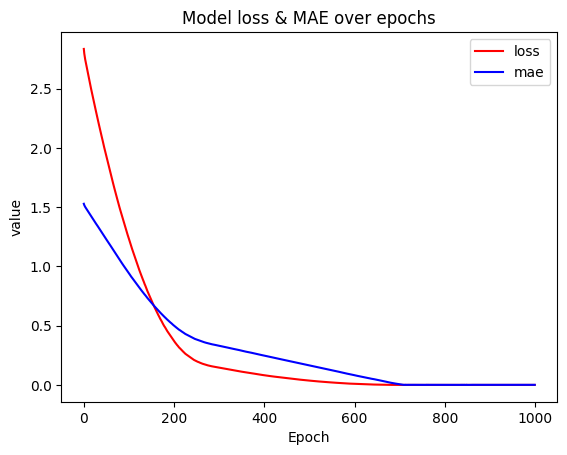

In [15]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch') # 학습횟수
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [16]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 14ms/step


array([[0.31938022],
       [0.3373754 ]], dtype=float32)

In [17]:
model.save('model/after_learning.h5')

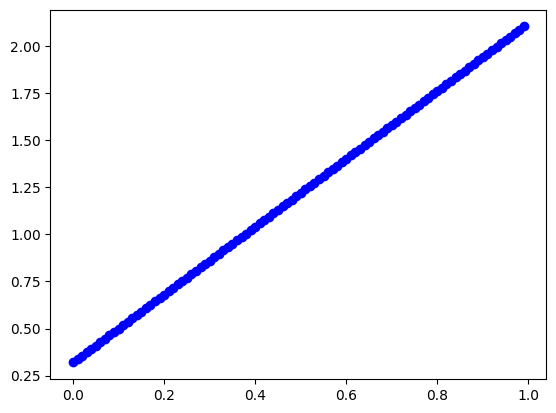

In [18]:
# 실제값
plt.scatter(x=scaled_data_C,
           y=scaled_data_F,
           c='b')
plt.show()

In [19]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y, in zip(y_hat, scaled_data_F) : 
    print('예측값 : {}, 실제값 : {}, 오차 : {}'.format(h,
                                              y,
                                              h[0]-y))

4/4 [==============================] - 0s 1ms/step
예측값 : [0.31938022], 실제값 : 0.32, 오차 : -0.0006197762489318914
예측값 : [0.3373754], 실제값 : 0.33799999999999997, 오차 : -0.0006245975494384437
예측값 : [0.3553706], 실제값 : 0.35600000000000004, 오차 : -0.0006293890476227193
예측값 : [0.3733658], 실제값 : 0.374, 오차 : -0.0006342103481292716
예측값 : [0.391361], 실제값 : 0.392, 오차 : -0.0006390018463134917
예측값 : [0.40935618], 실제값 : 0.41, 오차 : -0.0006438231468200439
예측값 : [0.42735136], 실제값 : 0.428, 오차 : -0.0006486444473266517
예측값 : [0.44534653], 실제값 : 0.446, 오차 : -0.0006534657478332595
예측값 : [0.46334174], 실제값 : 0.46399999999999997, 오차 : -0.0006582572460174241
예측값 : [0.48133695], 실제값 : 0.48200000000000004, 오차 : -0.0006630487442016997
예측값 : [0.49933213], 실제값 : 0.5, 오차 : -0.000667870044708252
예측값 : [0.5173273], 실제값 : 0.518, 오차 : -0.0006726913452148597
예측값 : [0.5353225], 실제값 : 0.536, 오차 : -0.0006775126457214675
예측값 : [0.55331767], 실제값 : 0.554, 오차 : -0.0006823339462280753
예측값 : [0.5713129], 실제값 : 0.5720000000000001, 오차 : -

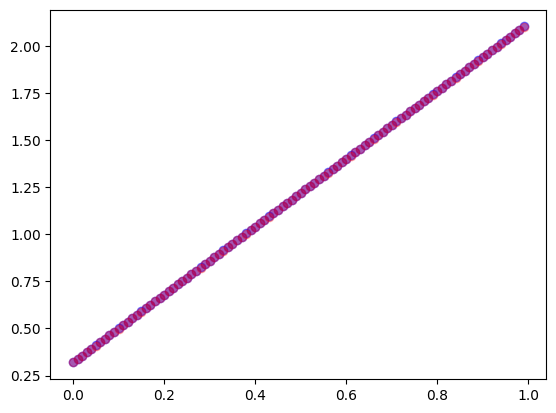

In [20]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.3)

## 2.2 노이즈가 있는 데이터로 실습

In [21]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균 0, 표준편차 0,1인 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

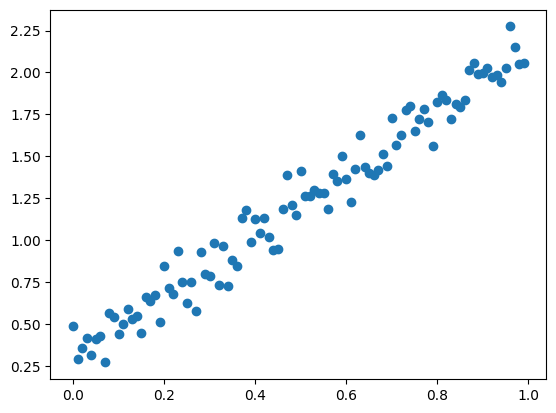

In [22]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [23]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1, )))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7146 - mae: 0.7892
Epoch 2/1000
4/4 [==============================] - 0s 819us/step - loss: 0.6953 - mae: 0.7776
Epoch 3/1000
4/4 [==============================] - 0s 666us/step - loss: 0.6831 - mae: 0.7703
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6709 - mae: 0.7629
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6598 - mae: 0.7561
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6497 - mae: 0.7497
Epoch 7/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.6401 - mae: 0.7438
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6306 - mae: 0.7377
Epoch 9/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.6220 - mae: 0.7323
Epoch 10/1000
4/4 [==============================] - 0s 667us/step - loss: 0.6134 - mae: 0.7268
Epoch 11/1000
4/4 [==============================] - 0s 8

4/4 [==============================] - 0s 1ms/step - loss: 0.1269 - mae: 0.2958
Epoch 88/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1235 - mae: 0.2914
Epoch 89/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1206 - mae: 0.2874
Epoch 90/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.1169 - mae: 0.2825
Epoch 91/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.1137 - mae: 0.2781
Epoch 92/1000
4/4 [==============================] - 0s 835us/step - loss: 0.1106 - mae: 0.2740
Epoch 93/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1077 - mae: 0.2701
Epoch 94/1000
4/4 [==============================] - 0s 834us/step - loss: 0.1042 - mae: 0.2648
Epoch 95/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.1010 - mae: 0.2608
Epoch 96/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0980 - mae: 0.2564
Epoch 97/1000
4/4 [==============================] - 0s 1

4/4 [==============================] - 0s 666us/step - loss: 0.0222 - mae: 0.1229
Epoch 173/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220 - mae: 0.1224
Epoch 174/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0218 - mae: 0.1215
Epoch 175/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0217 - mae: 0.1210
Epoch 176/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0216 - mae: 0.1208
Epoch 177/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0214 - mae: 0.1203
Epoch 178/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0213 - mae: 0.1198
Epoch 179/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.1197
Epoch 180/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0210 - mae: 0.1193
Epoch 181/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0208 - mae: 0.1186
Epoch 182/1000
4/4 [==============================] - 0s 6

4/4 [==============================] - 0s 999us/step - loss: 0.0125 - mae: 0.0886
Epoch 258/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125 - mae: 0.0883
Epoch 259/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0124 - mae: 0.0881
Epoch 260/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124 - mae: 0.0877
Epoch 261/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123 - mae: 0.0876
Epoch 262/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0122 - mae: 0.0872
Epoch 263/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0122 - mae: 0.0870
Epoch 264/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0122 - mae: 0.0869
Epoch 265/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121 - mae: 0.0866
Epoch 266/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121 - mae: 0.0865
Epoch 267/1000
4/4 [==============================] - 0s 1

4/4 [==============================] - 0s 667us/step - loss: 0.0105 - mae: 0.0810
Epoch 343/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - mae: 0.0807
Epoch 344/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - mae: 0.0805
Epoch 345/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0105 - mae: 0.0808
Epoch 346/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0105 - mae: 0.0809
Epoch 347/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - mae: 0.0809
Epoch 348/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0105 - mae: 0.0809
Epoch 349/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0105 - mae: 0.0809
Epoch 350/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0105 - mae: 0.0807
Epoch 351/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - mae: 0.0804
Epoch 352/1000
4/4 [==============================]

4/4 [==============================] - 0s 999us/step - loss: 0.0103 - mae: 0.0805
Epoch 428/1000
4/4 [==============================] - 0s 859us/step - loss: 0.0103 - mae: 0.0806
Epoch 429/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0103 - mae: 0.0807
Epoch 430/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0809
Epoch 431/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0809
Epoch 432/1000
4/4 [==============================] - 0s 699us/step - loss: 0.0103 - mae: 0.0806
Epoch 433/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0103 - mae: 0.0805
Epoch 434/1000
4/4 [==============================] - 0s 680us/step - loss: 0.0103 - mae: 0.0805
Epoch 435/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0803
Epoch 436/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0804
Epoch 437/1000
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0808
Epoch 514/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 516/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0804
Epoch 517/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 518/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 519/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0807
Epoch 520/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 521/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 522/1000
4/4 [==============================] - 0s 1000u

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 598/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0805
Epoch 599/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 600/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 601/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0805
Epoch 602/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0103 - mae: 0.0805
Epoch 603/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0807
Epoch 604/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 605/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0807
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 607/1000
4/4 [==============================]

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 683/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 684/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 685/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0809
Epoch 686/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0810
Epoch 687/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0808
Epoch 688/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 689/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 690/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0808
Epoch 691/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0808
Epoch 692/1000
4/4 [==============================] - 0s 1000u

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 768/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0806
Epoch 769/1000
4/4 [==============================] - 0s 695us/step - loss: 0.0103 - mae: 0.0809
Epoch 770/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 771/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0103 - mae: 0.0806
Epoch 772/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0804
Epoch 773/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0103 - mae: 0.0804
Epoch 774/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0103 - mae: 0.0804
Epoch 775/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0803
Epoch 776/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0809
Epoch 777/1000
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0803
Epoch 853/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0804
Epoch 854/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0103 - mae: 0.0805
Epoch 855/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 856/1000
4/4 [==============================] - 0s 838us/step - loss: 0.0103 - mae: 0.0805
Epoch 857/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 858/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0808
Epoch 859/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 860/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0103 - mae: 0.0807
Epoch 861/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 862/1000
4/4 [==============================] - 0s 1m

4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 938/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0103 - mae: 0.0805
Epoch 939/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0103 - mae: 0.0806
Epoch 940/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0805
Epoch 941/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0807
Epoch 942/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 943/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0103 - mae: 0.0805
Epoch 944/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 945/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0103 - mae: 0.0807
Epoch 946/1000
4/4 [==============================] - 0s 837us/step - loss: 0.0103 - mae: 0.0807
Epoch 947/1000
4/4 [==============================] - 0

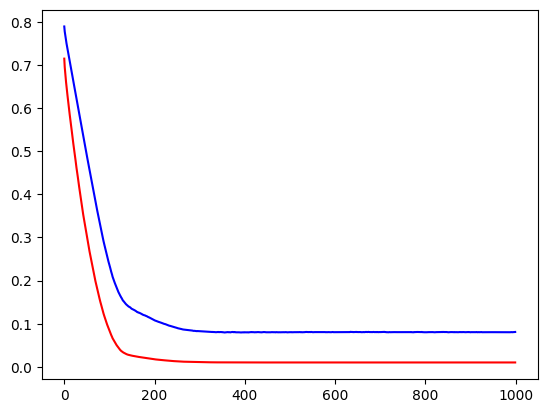

In [25]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [26]:
model2.save('model/noise_after_learning.h5')

In [27]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 669us/step


In [28]:
for h, y in zip(y_hat, noised_scaled_data_F) :
    print("실제값 : {}, 예측값 : {}, 오차 : {}". format(y,
                                               h,
                                               h[0]-y))

실제값 : 0.48905257038003563, 예측값 : [0.30162367], 오차 : -0.18742889813310265
실제값 : 0.2914062629459167, 예측값 : [0.320034], 오차 : 0.028627734351370282
실제값 : 0.3592820163678585, 예측값 : [0.33844435], 오차 : -0.020837664217895124
실제값 : 0.4147516282996508, 예측값 : [0.35685468], 오차 : -0.057896951099333405
실제값 : 0.31310769713742614, 예측값 : [0.37526503], 오차 : 0.06215733491556763
실제값 : 0.4102065572905948, 예측값 : [0.39367536], 오차 : -0.01653120018724702
실제값 : 0.42791096141420687, 예측값 : [0.4120857], 오차 : -0.0158252494581827
실제값 : 0.2705275693654579, 예측값 : [0.43049604], 오차 : 0.15996846764092026
실제값 : 0.5657658005663493, 예측값 : [0.44890636], 오차 : -0.11685943850961711
실제값 : 0.542049851591955, 예측값 : [0.46731672], 오차 : -0.07473313468254639
실제값 : 0.43745710260332404, 예측값 : [0.48572707], 오차 : 0.04826996915876092
실제값 : 0.5008451738804279, 예측값 : [0.5041374], 오차 : 0.0032922229320110352
실제값 : 0.5865299374196752, 예측값 : [0.5225477], 오차 : -0.06398221555688222
실제값 : 0.5278643584808353, 예측값 : [0.54095805], 오차 : 0.01309368843231

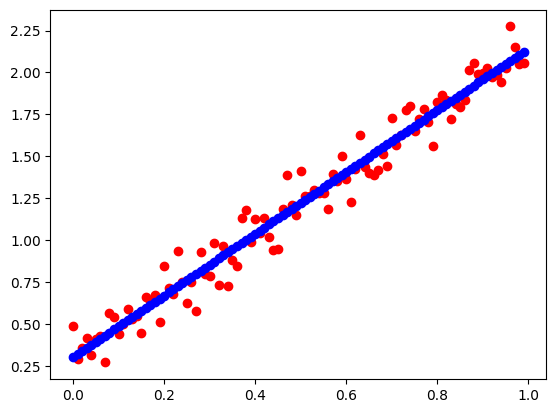

In [29]:
plt.scatter(x=scaled_data_C,
           y=noised_scaled_data_F,
           c='r')
plt.scatter(x=scaled_data_C,
           y=y_hat,
           c='b')